In [1]:
import pandas as pd #used for working with data set.has functions for analyzing, cleaning, exploring, and manipulating data.
import numpy as np #guarantee efficient calculations with arrays and matrices
import matplotlib.pyplot as plt #data visualization and graphical plotting library for Python
from datetime import datetime #classes for manipulating dates and times
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor 
    ##how much a feature's inclusion contributes to the overall variance of the coefficients

In [2]:
# Loading the Dataset and using pandas to load and handle the data
data = pd.read_csv("cabdata.csv")
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) #this helps in handling and manipulating the datetime data
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [3]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


<AxesSubplot:xlabel='Day', ylabel='Density'>

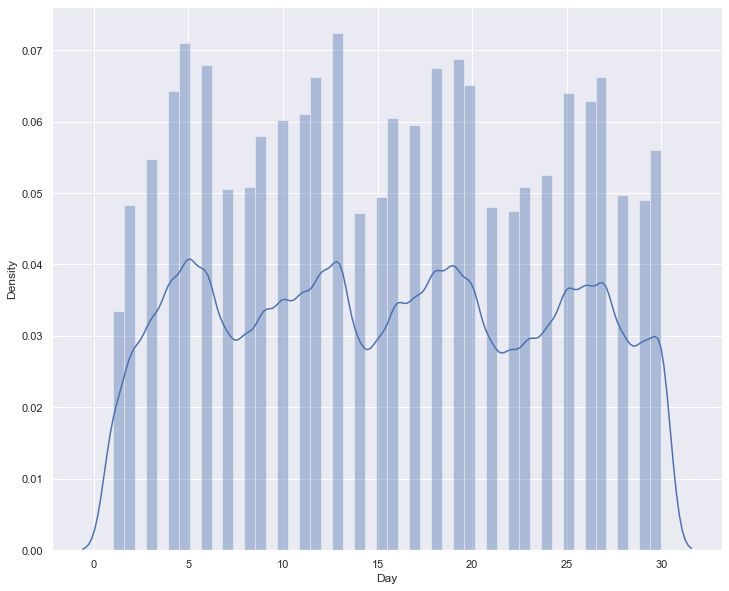

In [4]:
import seaborn as sns #to visualize random distributions
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Day"])
#booking pattern is alsmot similar across the month

<AxesSubplot:xlabel='Hour', ylabel='Density'>

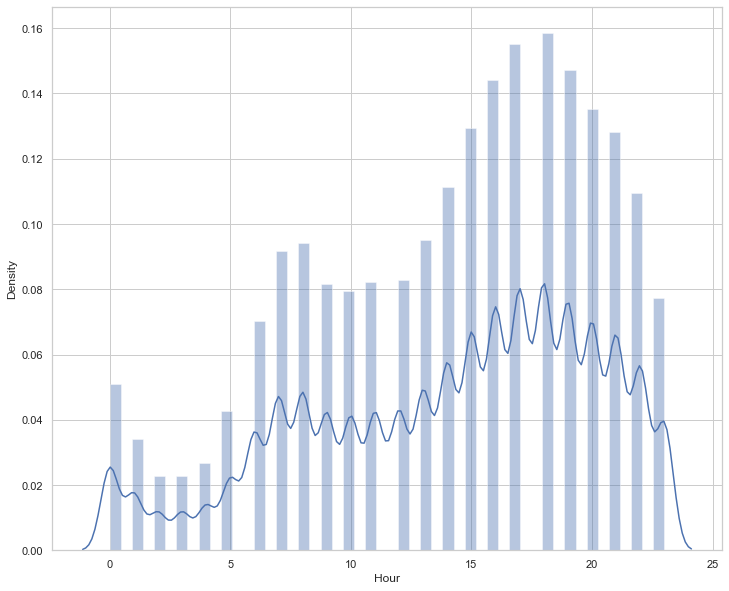

In [5]:
#checking the density of booking 
sns.set_style('whitegrid')
sns.distplot(data["Hour"])
#we see there a more no of booking in late evening

<AxesSubplot:xlabel='Weekday', ylabel='Density'>

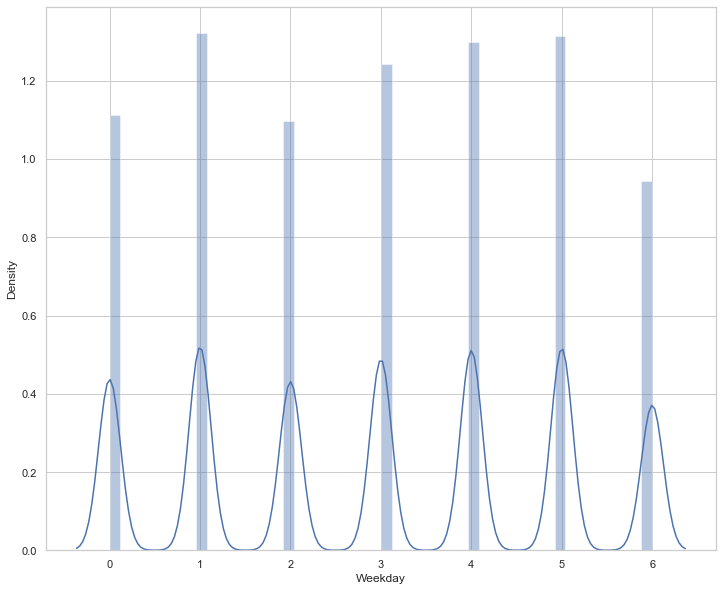

In [6]:
#checking the density of booking 
sns.set_style('whitegrid')
sns.distplot(data["Weekday"])
# we see there is demand on weekend as well

<AxesSubplot:xlabel='Hour', ylabel='Hour'>

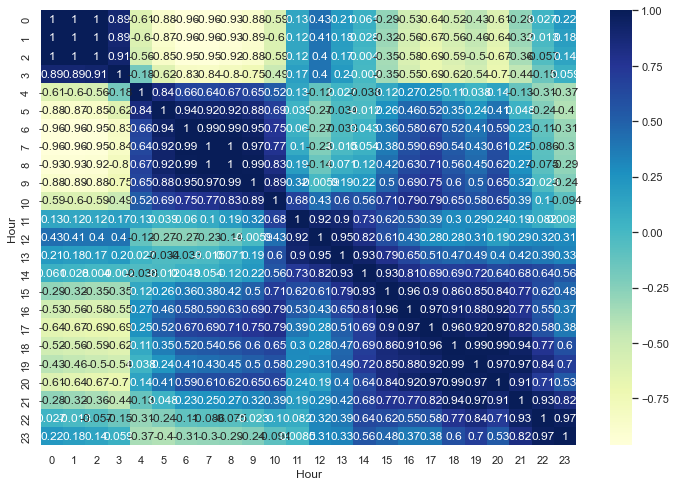

In [7]:
# plotting correlation between Weekday and Hour
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot = True,cmap='YlGnBu')
##sns.heatmap(df.corr(), annot=False)
##sns.scatterplot(x='HOUR', y='WEEKDAY',data=df, annot=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


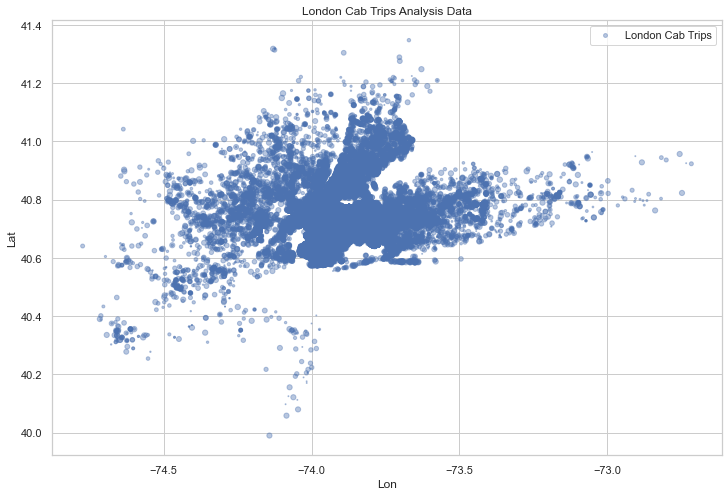

In [8]:
#Plotting Scatter Analysis to check the booking Density
sns.set_style('whitegrid')
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='London Cab Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("London Cab Trips Analysis Data")
plt.legend()
plt.show()